In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('transaction_dataset.csv')

In [3]:
data.head()

,ID,Date,Customer_ID,Transaction_Amount,Transaction_Type,Payment_Method,Account_Balance,Category,Location,Transaction_Status
0,1,2023-01-01 00:00:00,CUST001,27337.49,Transfer,Bank Transfer,804821.06,Electronics,New York,Pending
1,2,2023-01-02 00:00:00,CUST002,97716.60,Purchase,Credit Card,540169.76,Electronics,Houston,Pending
2,3,2023-01-03 00:00:00,CUST003,5752.36,Transfer,Debit Card,925251.60,Electronics,New York,Completed
3,4,2023-01-04 00:00:00,CUST004,93443.22,Transfer,Debit Card,704136.27,Savings,New York,Failed
4,5,2023-01-05 00:00:00,CUST005,15109.98,Purchase,Bank Transfer,285987.99,Electronics,Houston,Pending


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  100000 non-null  int64  
 1   Date                100000 non-null  object 
 2   Customer_ID         100000 non-null  object 
 3   Transaction_Amount  100000 non-null  float64
 4   Transaction_Type    100000 non-null  object 
 5   Payment_Method      100000 non-null  object 
 6   Account_Balance     100000 non-null  float64
 7   Category            100000 non-null  object 
 8   Location            100000 non-null  object 
 9   Transaction_Status  100000 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [5]:
data['Location'].value_counts()

Location
Houston        20144
Los Angeles    20082
New York       20068
Miami          19910
Chicago        19796
Name: count, dtype: int64

In [6]:
# data dictionary
# id - transaction id
# date - transaction date
# customer_id - unique customer
# transaction_amount - the amount spent by the customer in a particular transaction
# transaction_type - purchasing a product or transferring money
# Payment_method - medium of making the transaction
# account_balance - amount remaining in the customers wallet after making the transaction
# category - category type of the product purchased
# Location - where was the transaction made?
# transaction_status - success/failure/pending

In [7]:
# Insights that can be generated: EDA - exploratory data analysis

# 1. Transaction trends over time Month on month analysis, week on week analysis, year on year analysis, daily trasaction count, average monthly transaction count.
# 2. location wise analysis - Hotspots - (customer count > median customer count and transaction value > average transaction value)
# 3. payment method analysis - in which payment type is there maximum failures,
# 4. category analysis - average order value, median order value - pricing analysis
# 5. purchasing power - average account balance + average order value
# 6. Customer segmentation analysis - gold membership, silver membership, bronze membership. recency, frequency, monetary (RFM) - customer score - average/median
# 7. 

In [8]:
# data['Date'] = pd.to_datetime(data['Date'], error = 'coerce') - this code will convert all the valid dates and set invalid dates to nall

In [9]:
data['Date_Modified_only_date'] = data['Date'].astype('datetime64[ms]')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ID                       100000 non-null  int64         
 1   Date                     100000 non-null  object        
 2   Customer_ID              100000 non-null  object        
 3   Transaction_Amount       100000 non-null  float64       
 4   Transaction_Type         100000 non-null  object        
 5   Payment_Method           100000 non-null  object        
 6   Account_Balance          100000 non-null  float64       
 7   Category                 100000 non-null  object        
 8   Location                 100000 non-null  object        
 9   Transaction_Status       100000 non-null  object        
 10  Date_Modified_only_date  100000 non-null  datetime64[ms]
dtypes: datetime64[ms](1), float64(2), int64(1), object(7)
memory usage: 8.4+ MB


In [11]:
# daily basis analysis - in which hour is there a peak in transactions

In [12]:
data['Transaction_month']=data['Date_Modified_only_date'].dt.month

In [13]:
data['Transaction_year']=data['Date_Modified_only_date'].dt.year

In [14]:
data['Transaction_week'] = data['Date_Modified_only_date'].dt.isocalendar().week

In [15]:
data['Month_year']=data['Date_Modified_only_date'].dt.strftime('%b-%Y') # example - jan-2023

In [16]:
data['Day_name']=data['Date_Modified_only_date'].dt.day_name()

In [17]:
data['Quarter'] = data['Date_Modified_only_date'].dt.quarter

In [18]:
data['Transaction_week'] = data['Date_Modified_only_date'].dt.quarter

In [19]:
data['is_weekend'] = data['Date_Modified_only_date'].dt.weekday>= 5 # Return the day of the week as an integer 0-mon , 5-sat, 6-sun

In [20]:
data['Transaction_hour'] = data['Date_Modified_only_date'].dt.hour

In [21]:
data['Transaction_min'] = data['Date_Modified_only_date'].dt.minute

In [22]:
data1 = data.copy()

In [23]:
data1 = data1[data1['Transaction_year'] <=2025]

In [24]:
data.head()

,ID,Date,Customer_ID,Transaction_Amount,Transaction_Type,Payment_Method,Account_Balance,Category,Location,Transaction_Status,Date_Modified_only_date,Transaction_month,Transaction_year,Transaction_week,Month_year,Day_name,Quarter,is_weekend,Transaction_hour,Transaction_min
0,1,2023-01-01 00:00:00,CUST001,27337.49,Transfer,Bank Transfer,804821.06,Electronics,New York,Pending,2023-01-01,1,2023,1,Jan-2023,Sunday,1,True,0,0
1,2,2023-01-02 00:00:00,CUST002,97716.60,Purchase,Credit Card,540169.76,Electronics,Houston,Pending,2023-01-02,1,2023,1,Jan-2023,Monday,1,False,0,0
2,3,2023-01-03 00:00:00,CUST003,5752.36,Transfer,Debit Card,925251.60,Electronics,New York,Completed,2023-01-03,1,2023,1,Jan-2023,Tuesday,1,False,0,0
3,4,2023-01-04 00:00:00,CUST004,93443.22,Transfer,Debit Card,704136.27,Savings,New York,Failed,2023-01-04,1,2023,1,Jan-2023,Wednesday,1,False,0,0
4,5,2023-01-05 00:00:00,CUST005,15109.98,Purchase,Bank Transfer,285987.99,Electronics,Houston,Pending,2023-01-05,1,2023,1,Jan-2023,Thursday,1,False,0,0


In [25]:
data = data[data['Transaction_year'] <=2025]

In [26]:
data['Transaction_year'].value_counts()

Transaction_year
2024    366
2023    365
2025    365
Name: count, dtype: int64

In [27]:
# how many customer transacted each year. plot the customer count in a bar graph 

In [28]:
customer_counts_per_year = data.groupby(['Transaction_year'])['Customer_ID'].size().reset_index()

In [29]:
customer_counts_per_year

,Transaction_year,Customer_ID
0,2023,365
1,2024,366
2,2025,365


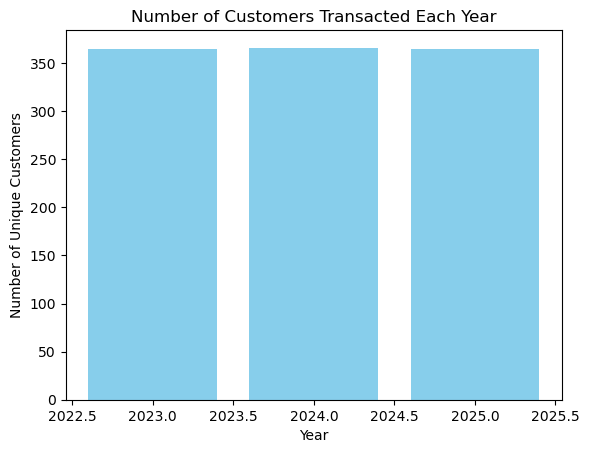

In [30]:
plt.bar(customer_counts_per_year['Transaction_year'], customer_counts_per_year['Customer_ID'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')
plt.title('Number of Customers Transacted Each Year')
plt.show()

In [31]:
# for each year, plot the monthly trend of average order value

In [32]:
monthly_average_transaction_value = data.groupby(['Month_year'])['Transaction_Amount'].mean().reset_index()

In [33]:
monthly_average_transaction_value = monthly_average_transaction_value.rename(columns={'Transaction_Amount':'Monthly_Average'})

In [34]:
monthly_average_transaction_value['Year'] = monthly_average_transaction_value['Month_year'].str.split('-').str[1]

In [35]:
monthly_average_transaction_value

,Month_year,Monthly_Average,Year
0,Apr-2023,43196.678000,2023
1,Apr-2024,45069.879333,2024
2,Apr-2025,56819.789333,2025
3,Aug-2023,42550.991613,2023
4,Aug-2024,51937.488387,2024
5,Aug-2025,57471.836129,2025
6,Dec-2023,53018.769355,2023
7,Dec-2024,41119.016129,2024
8,Dec-2025,49650.075484,2025
9,Feb-2023,37856.740357,2023


In [36]:
Year = list(set(monthly_average_transaction_value['Year'].tolist()))

In [37]:
Year

['2025', '2023', '2024']

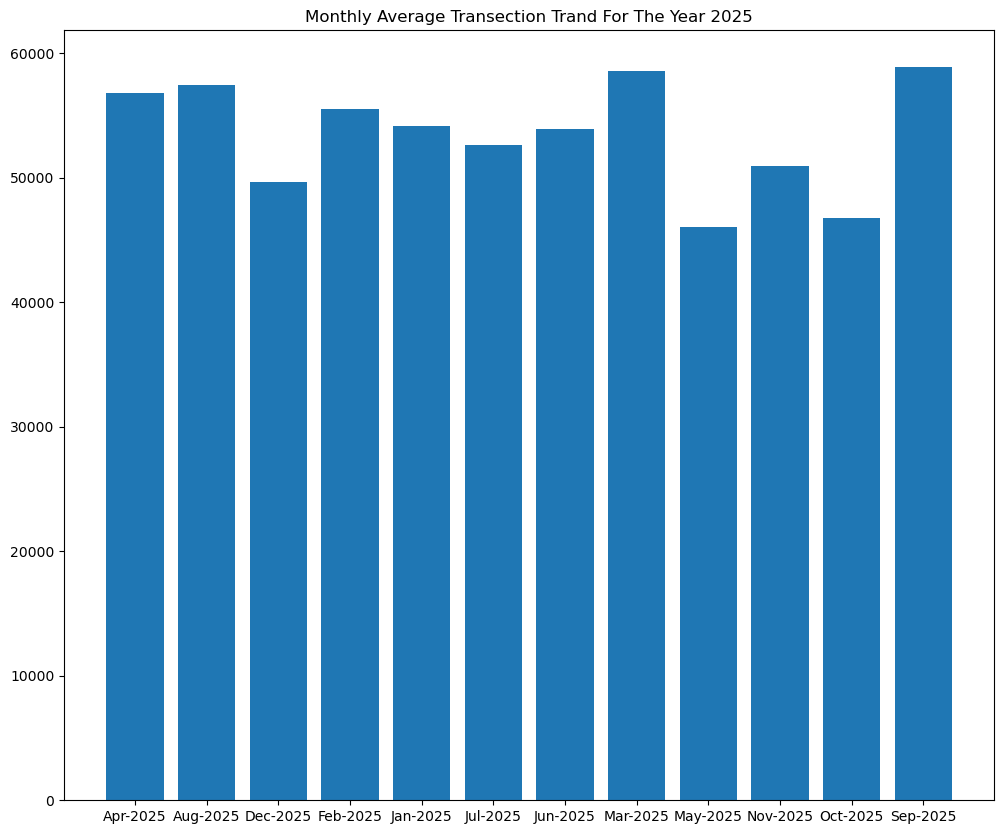

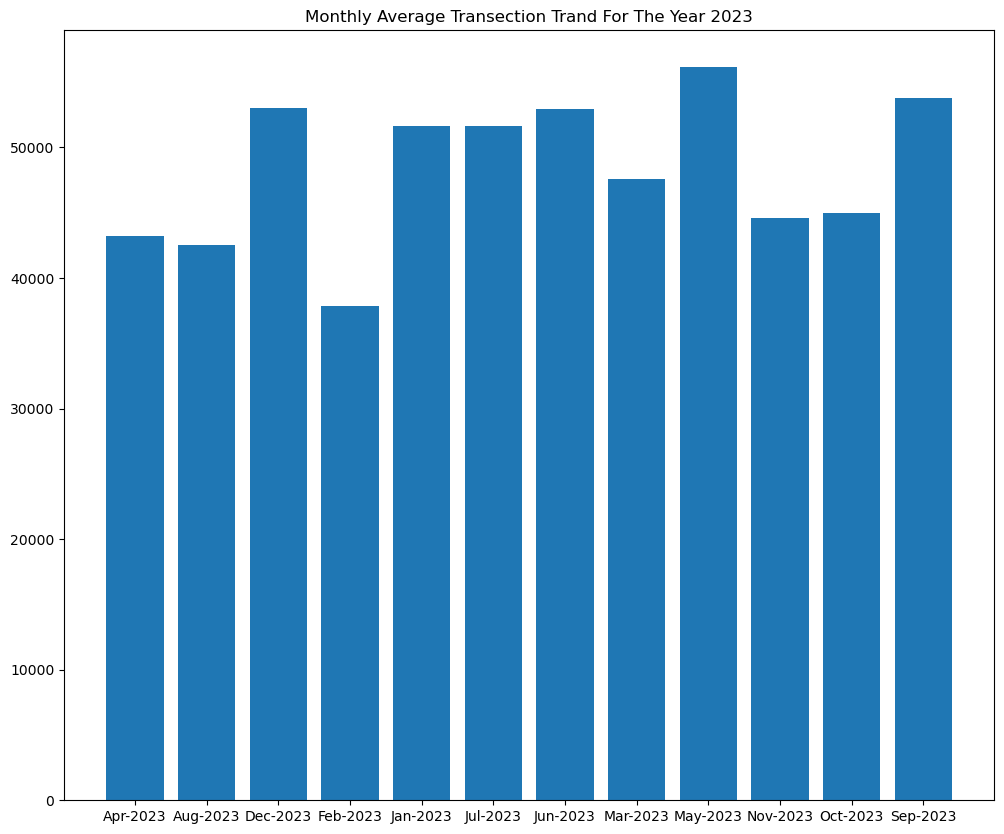

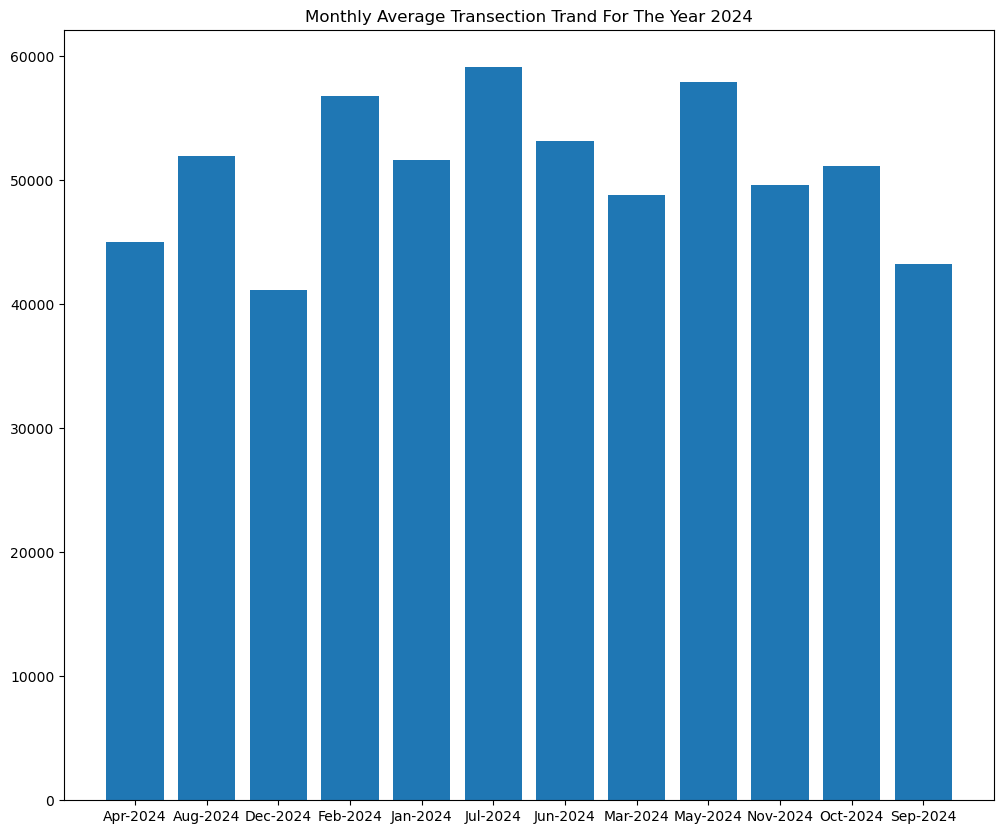

In [38]:
for y in Year:
    df=monthly_average_transaction_value[monthly_average_transaction_value['Year']==y]
    plt.figure(figsize=(12, 10))
    plt.bar(df['Month_year'], df['Monthly_Average'])
    plt.title(f'Monthly Average Transection Trand For The Year {y}')
    plt.show()

# sort bars in ascinding order (jan, feb, mar)

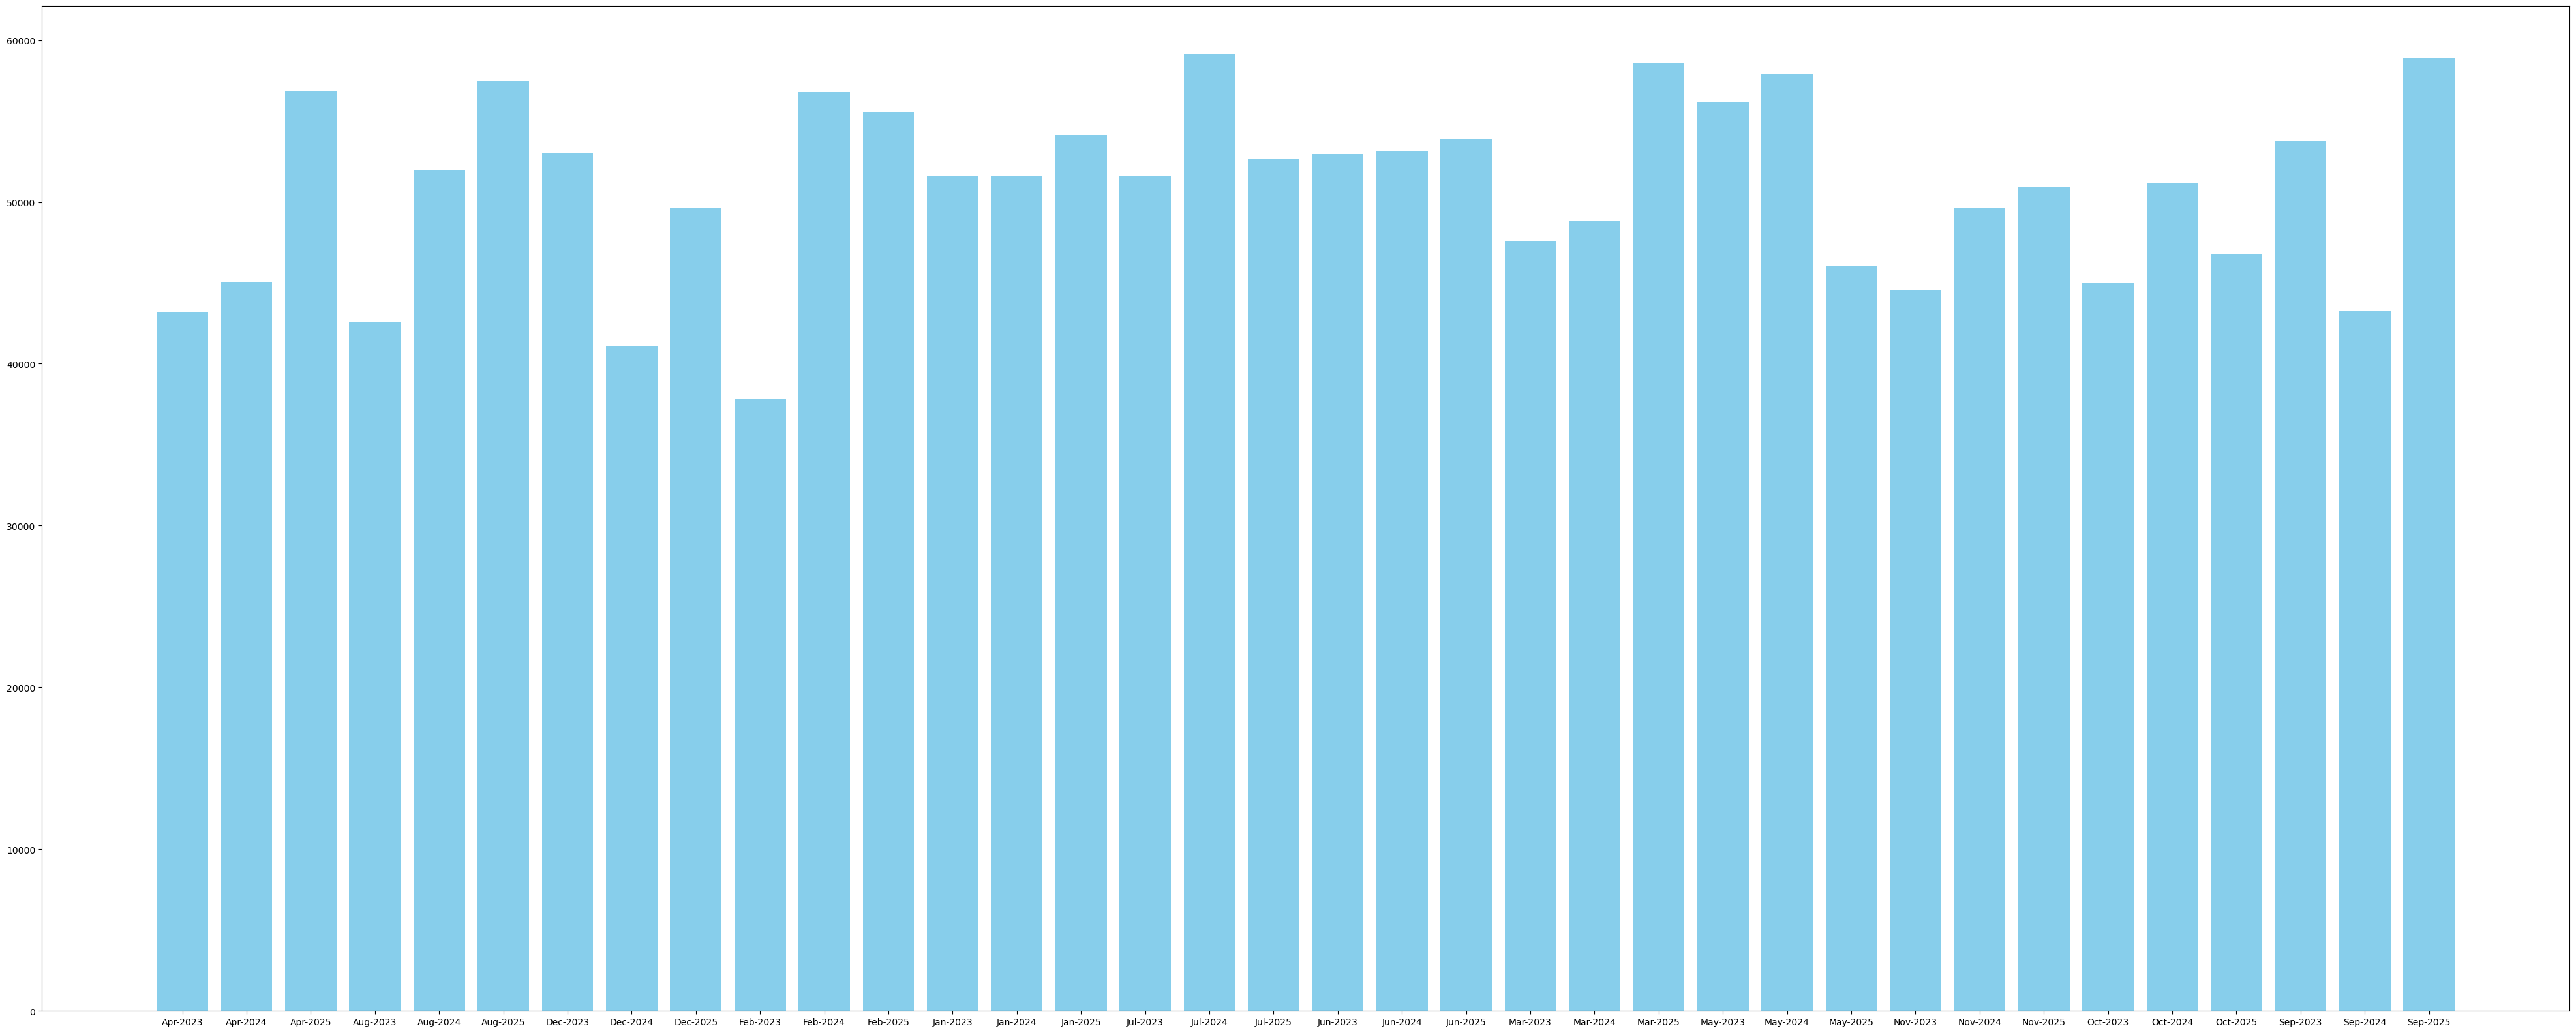

In [39]:
plt.figure(figsize=(50, 20))
plt.bar(monthly_average_transaction_value['Month_year'], monthly_average_transaction_value['Monthly_Average'], color='skyblue')
plt.show()

In [40]:
# for each year, display the week on week transaction value trend for each quarter 3 year 4 quarters
# how many weeks are there in a quarter - 12
# Get dataframe which has year, quarter, week, total transaction value

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1095
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1096 non-null   int64         
 1   Date                     1096 non-null   object        
 2   Customer_ID              1096 non-null   object        
 3   Transaction_Amount       1096 non-null   float64       
 4   Transaction_Type         1096 non-null   object        
 5   Payment_Method           1096 non-null   object        
 6   Account_Balance          1096 non-null   float64       
 7   Category                 1096 non-null   object        
 8   Location                 1096 non-null   object        
 9   Transaction_Status       1096 non-null   object        
 10  Date_Modified_only_date  1096 non-null   datetime64[ms]
 11  Transaction_month        1096 non-null   int32         
 12  Transaction_year         1096 non-null 

In [42]:
df1 = data.groupby(['Transaction_year','Quarter','Transaction_week'])['Transaction_Amount'].sum().reset_index()

In [43]:
df1 = df1.rename(columns = {'Transaction_Amount':'Total_Transaction_Value'})

In [44]:
df1

,Transaction_year,Quarter,Transaction_week,Total_Transaction_Value
0,2023,1,1,4136346.92
1,2023,2,2,4626019.77
2,2023,3,3,4532729.11
3,2023,4,4,4374944.50
4,2024,1,1,4760957.55
5,2024,2,2,4743567.41
6,2024,3,3,4742391.51
7,2024,4,4,4349772.09
8,2025,1,1,5049627.46
9,2025,2,2,4748148.18


In [45]:
transacting_years = sorted(list(set(df1['Transaction_year'].tolist())))

In [46]:
quarters = sorted(list(set(df1['Quarter'].tolist())))

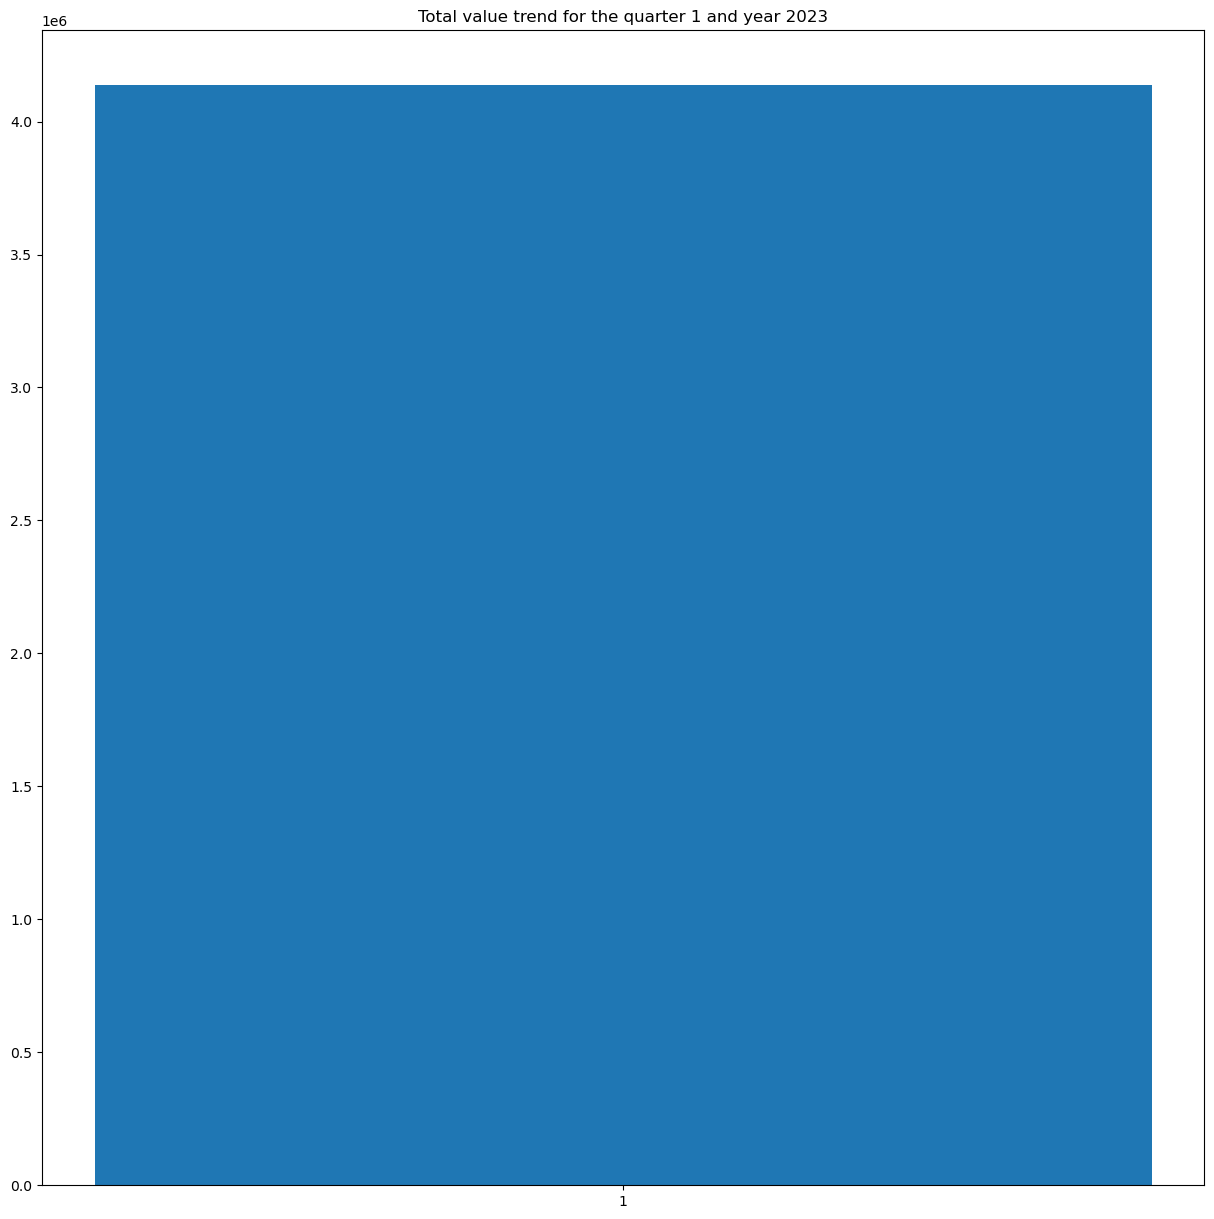

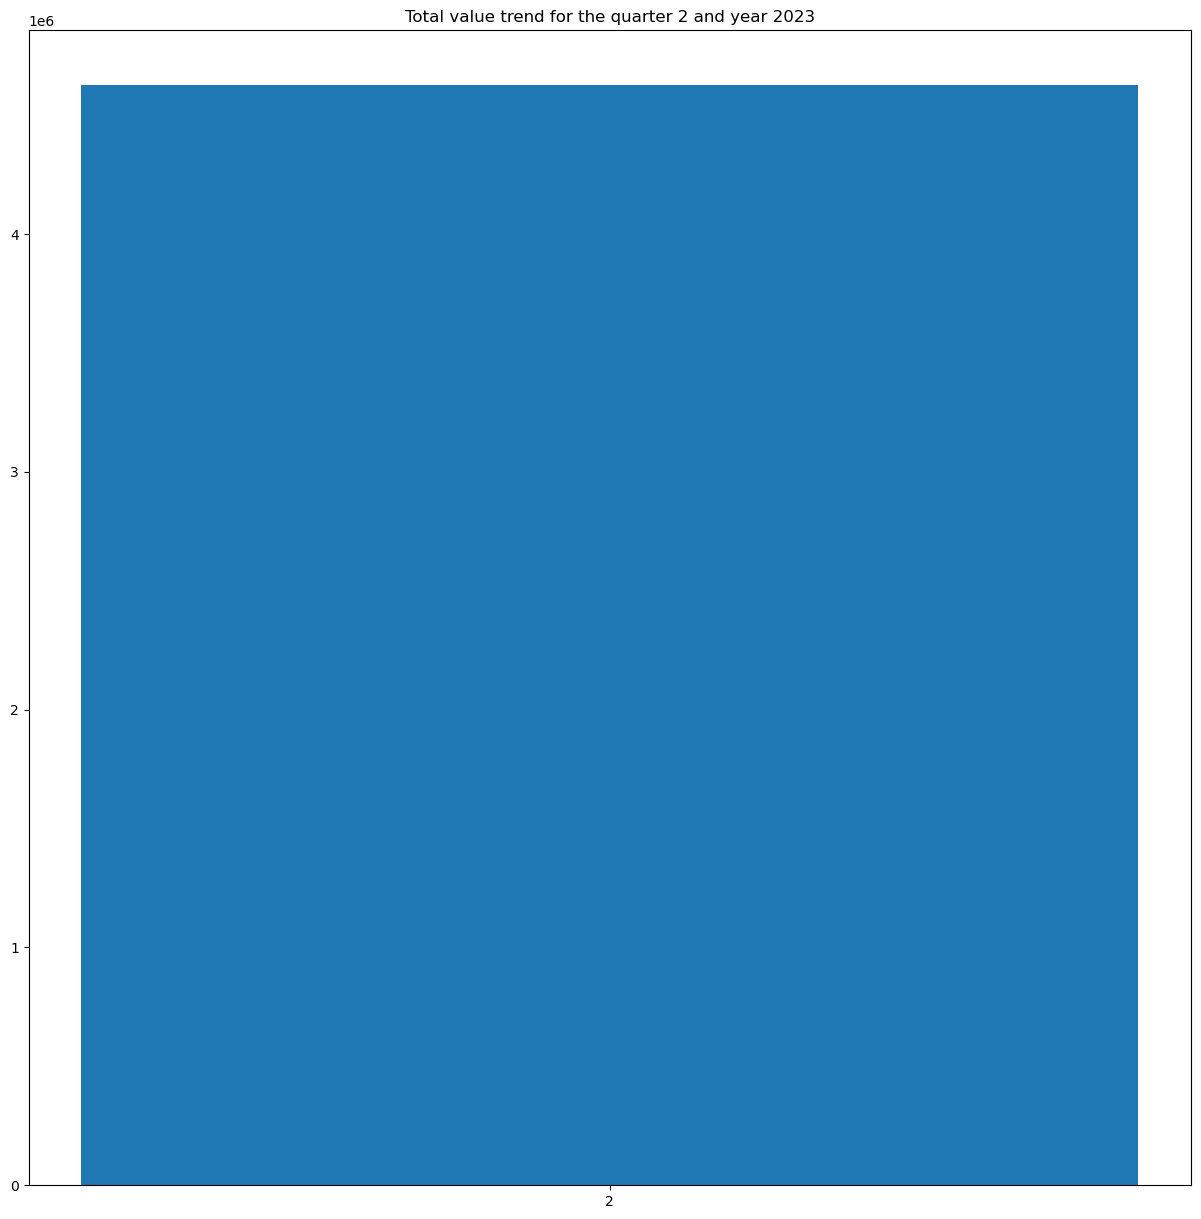

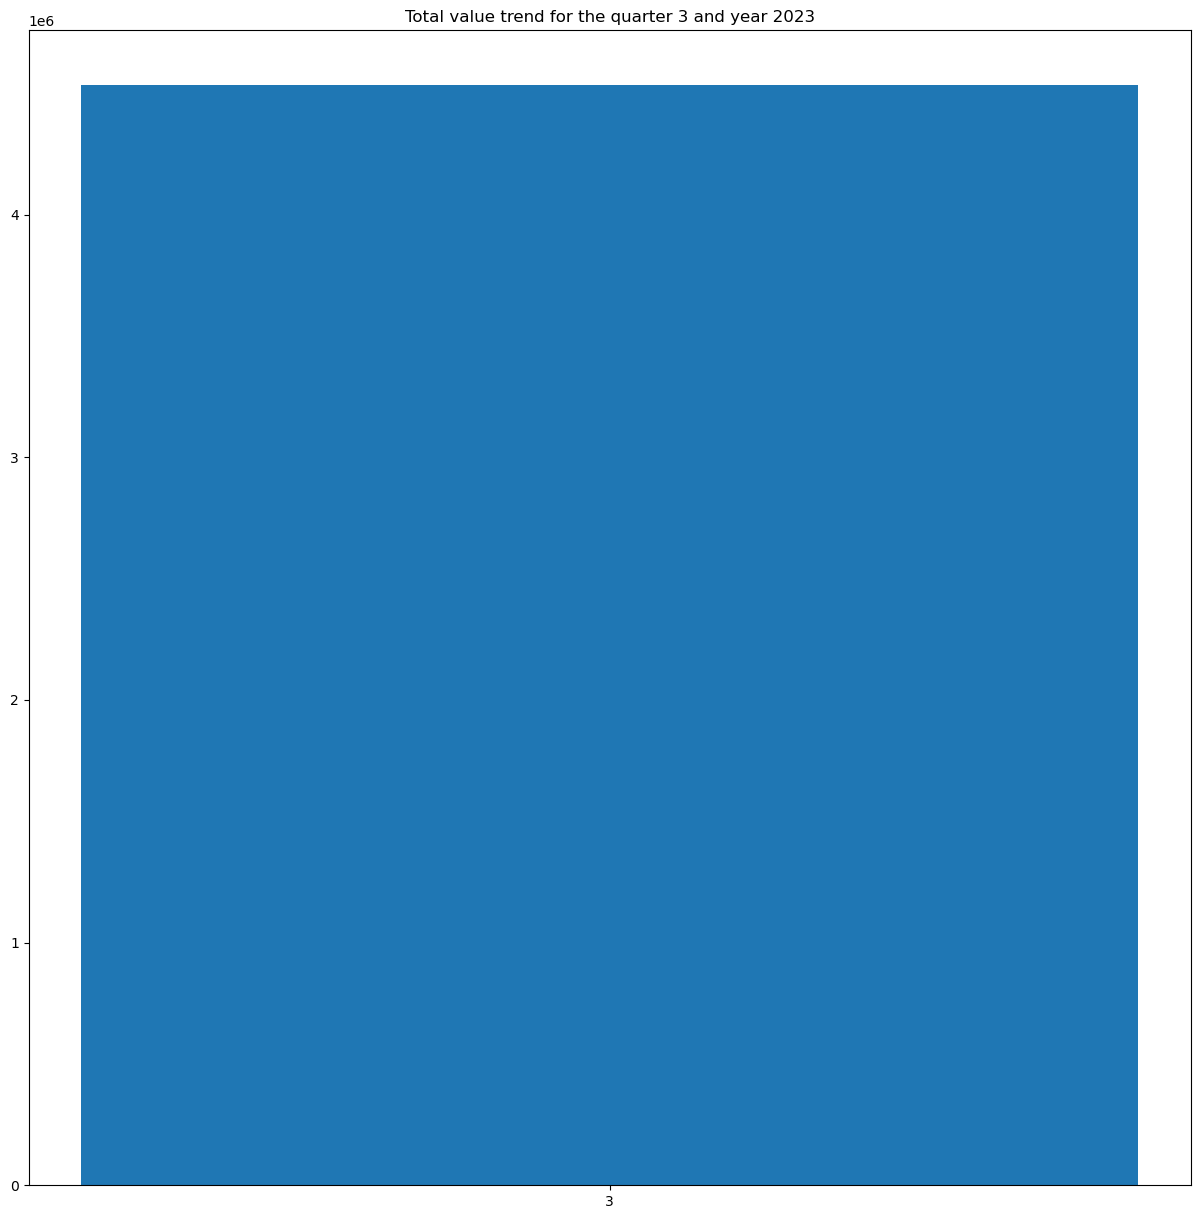

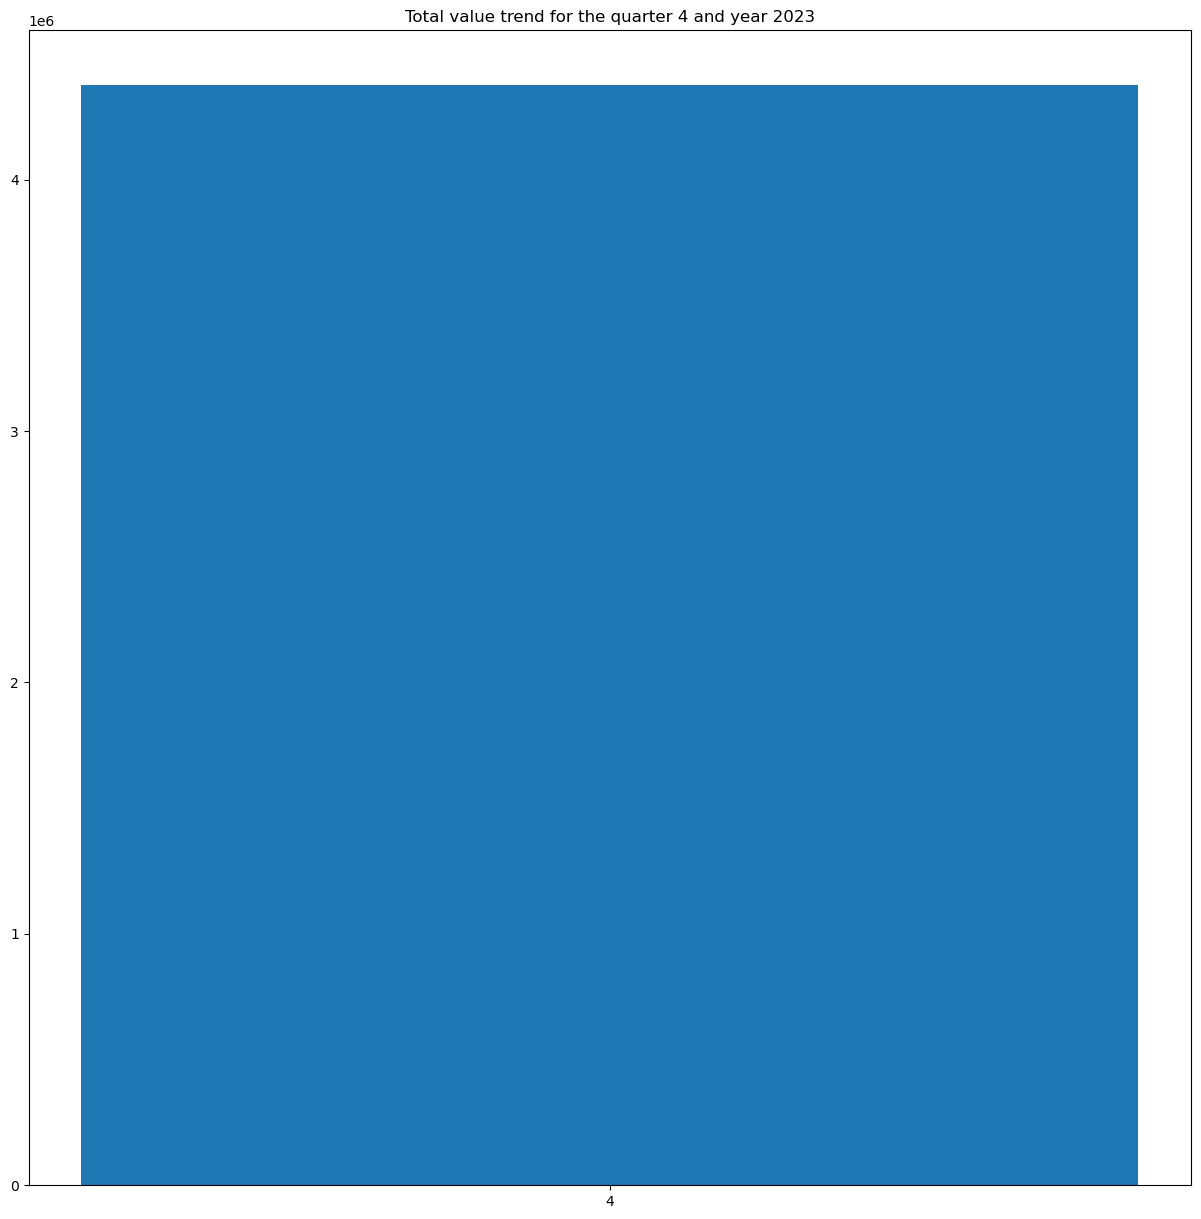

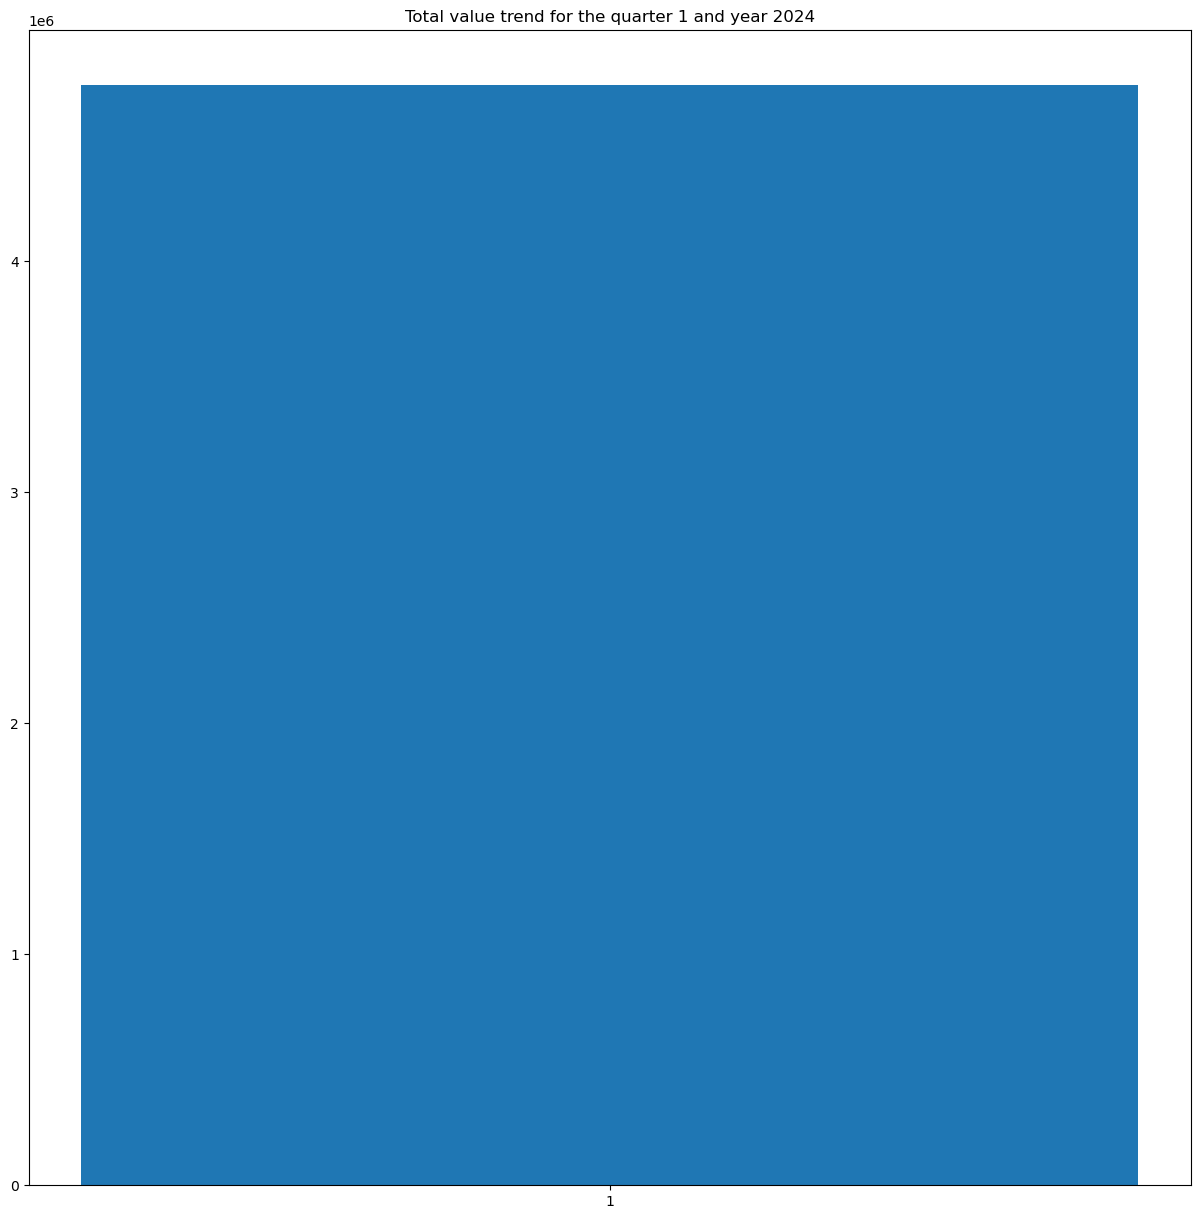

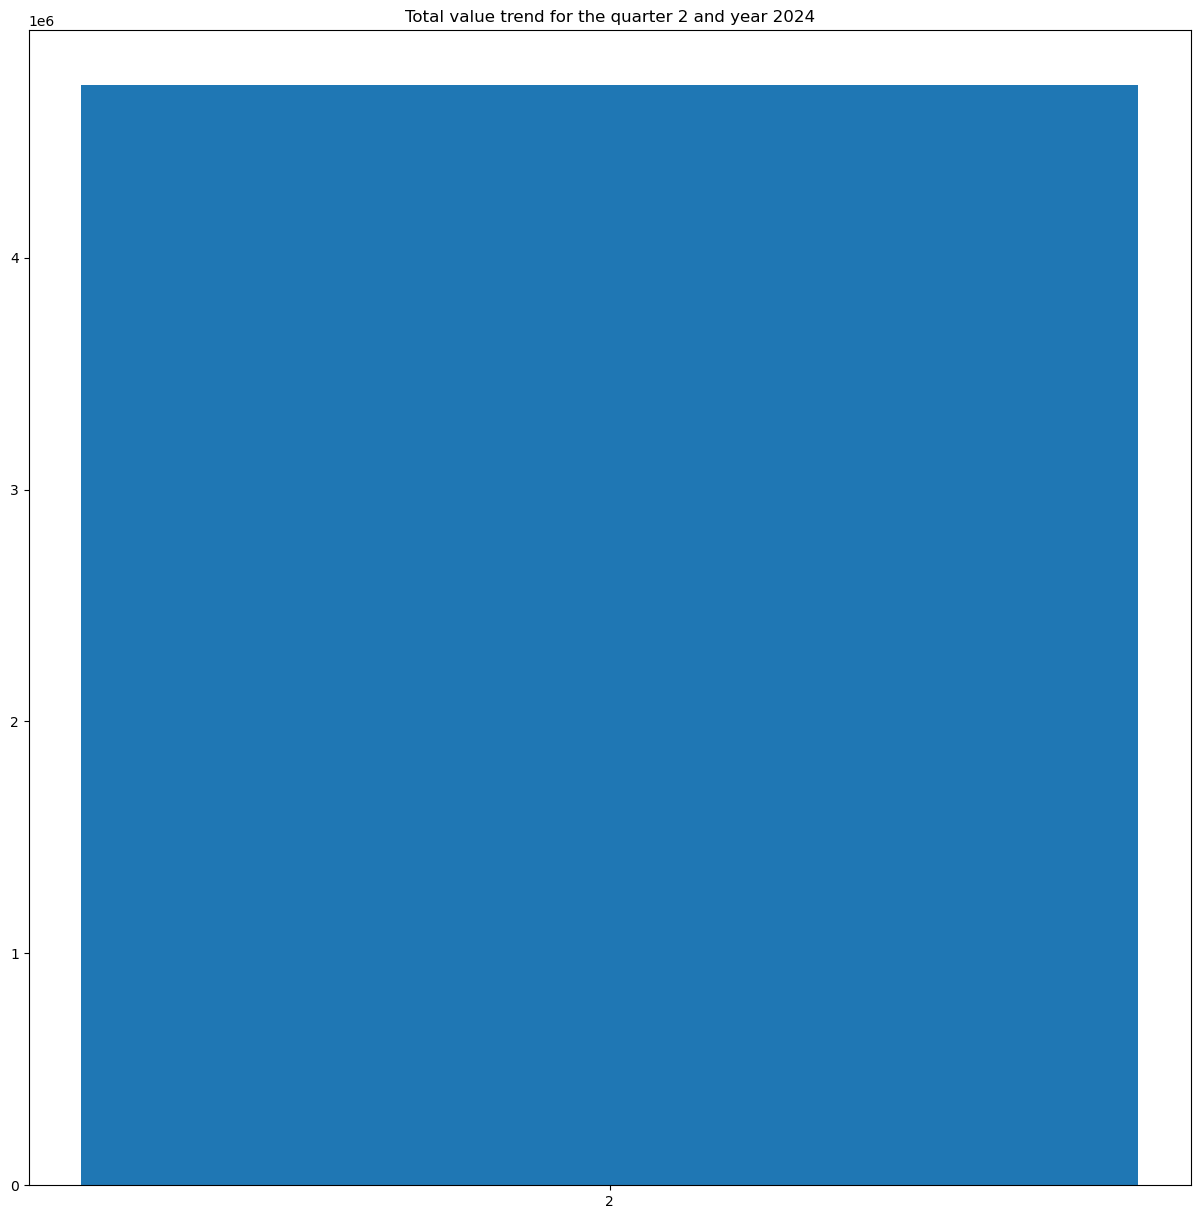

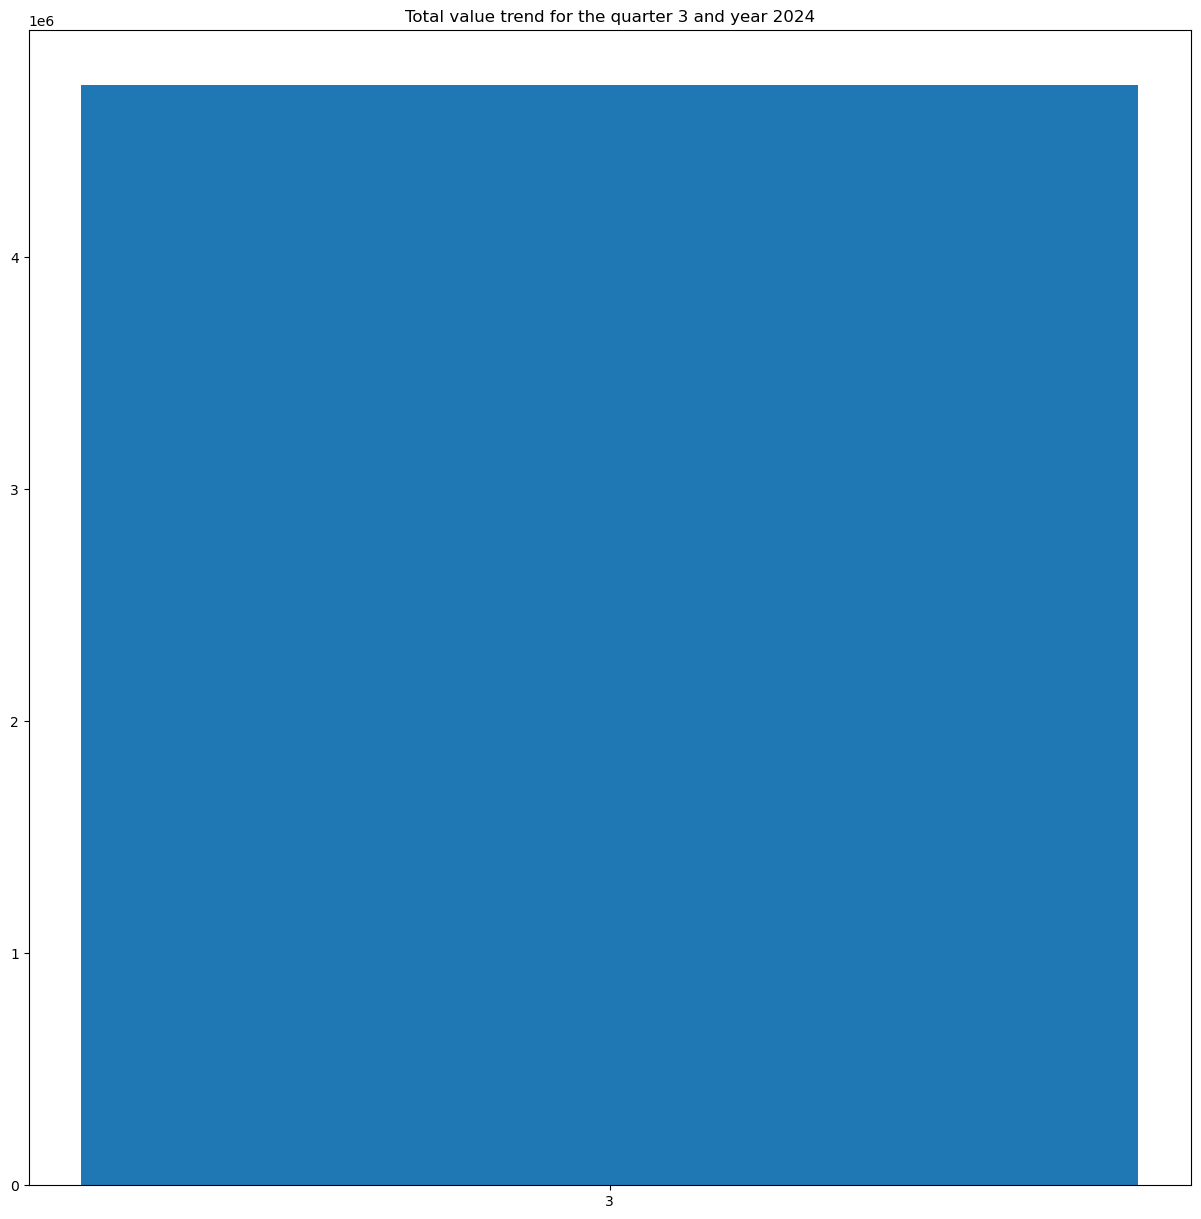

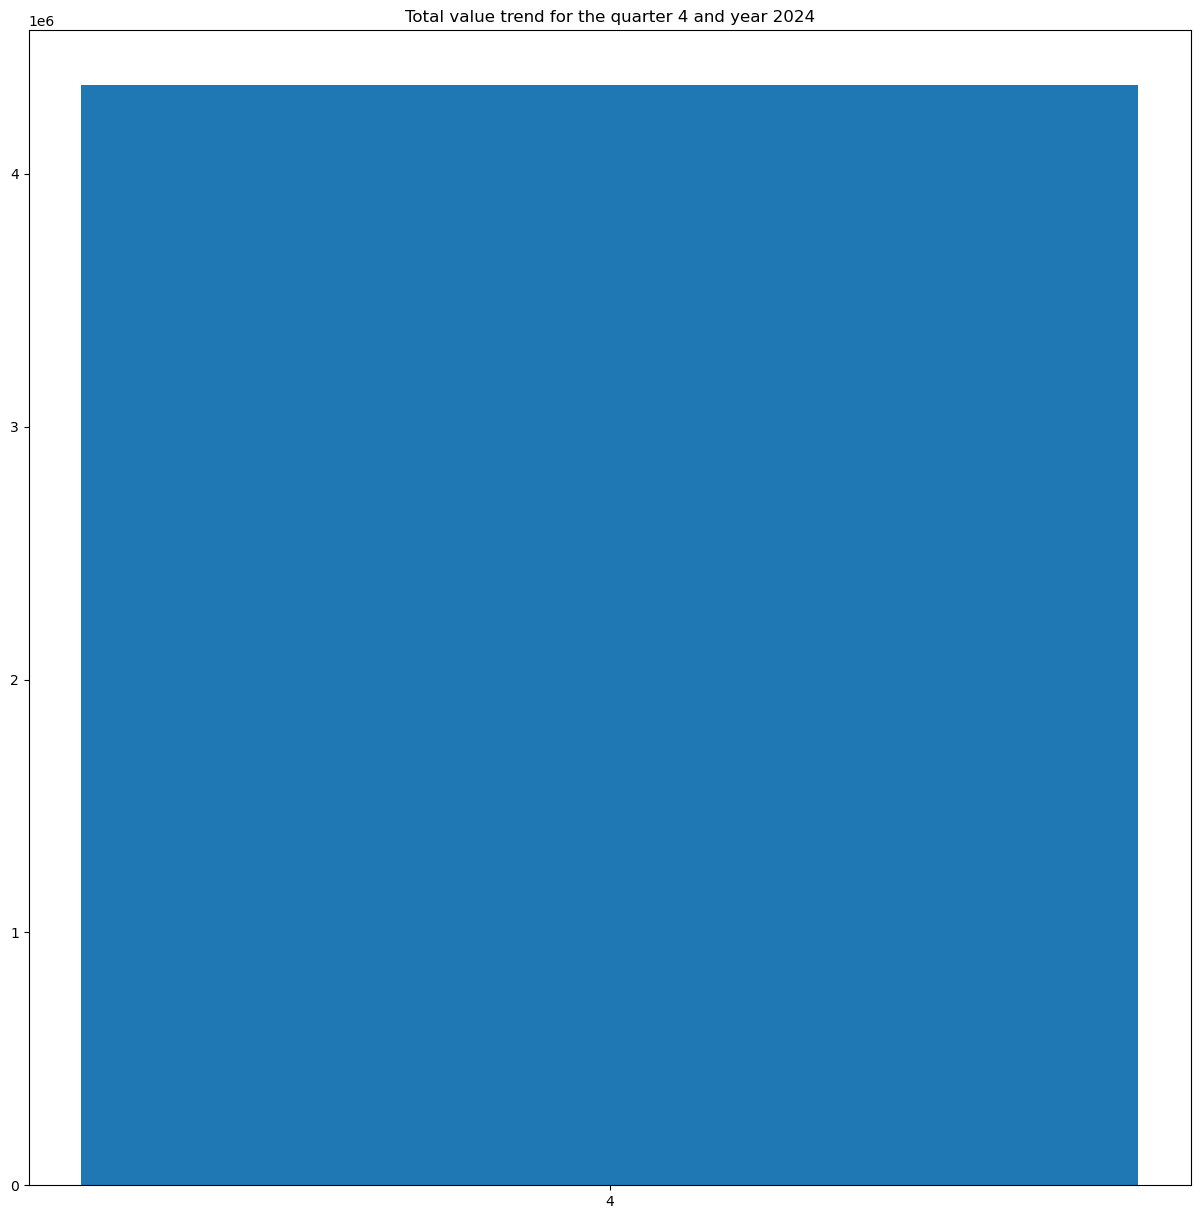

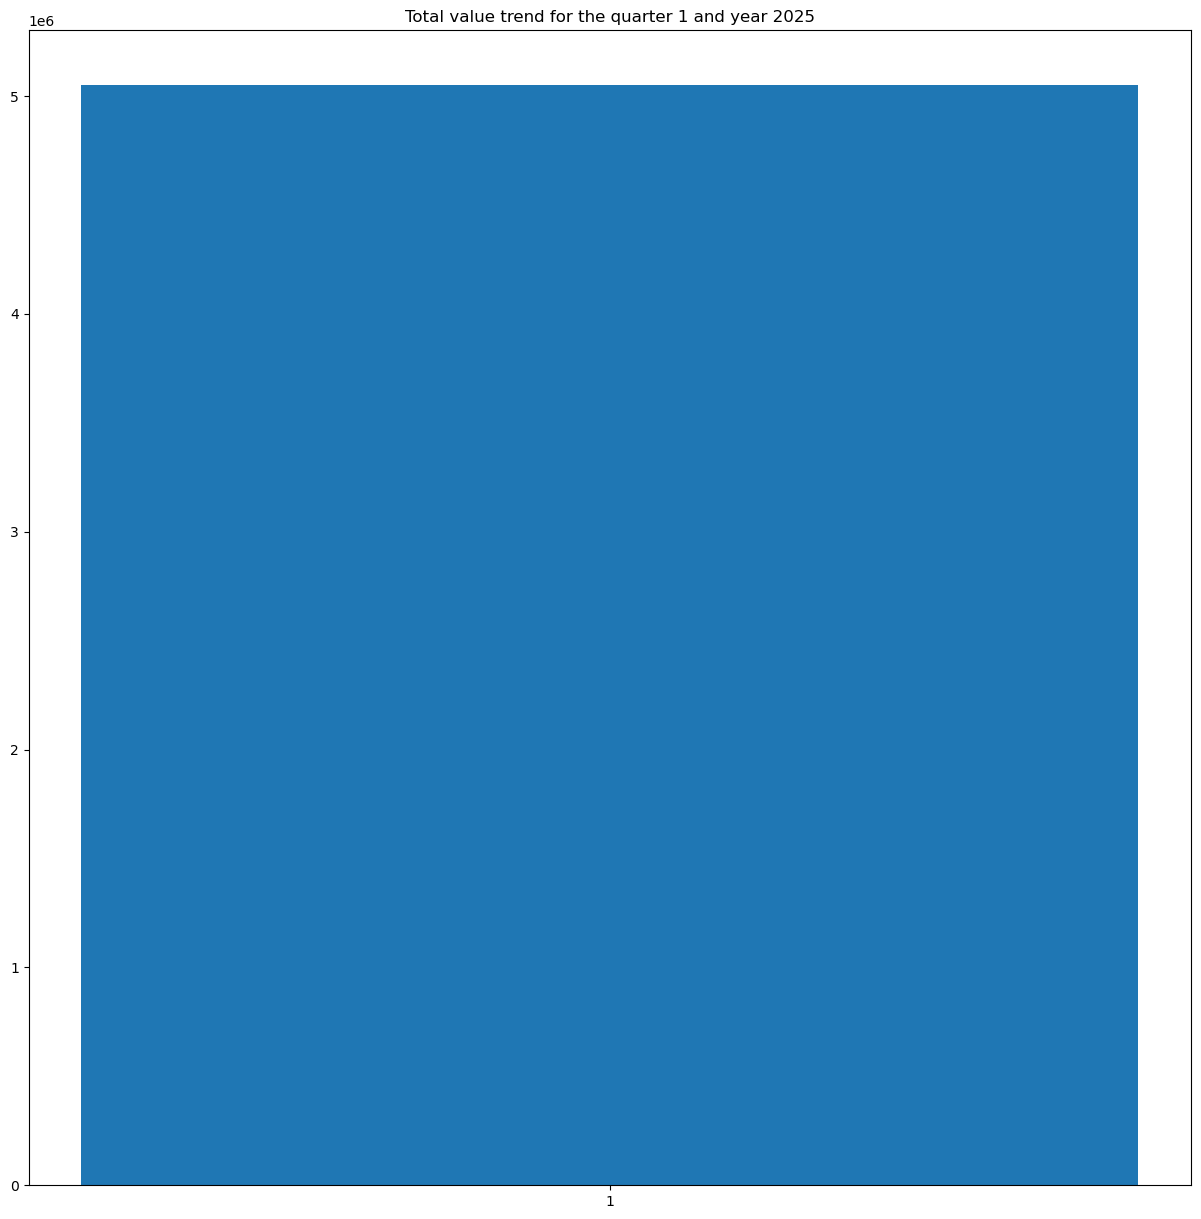

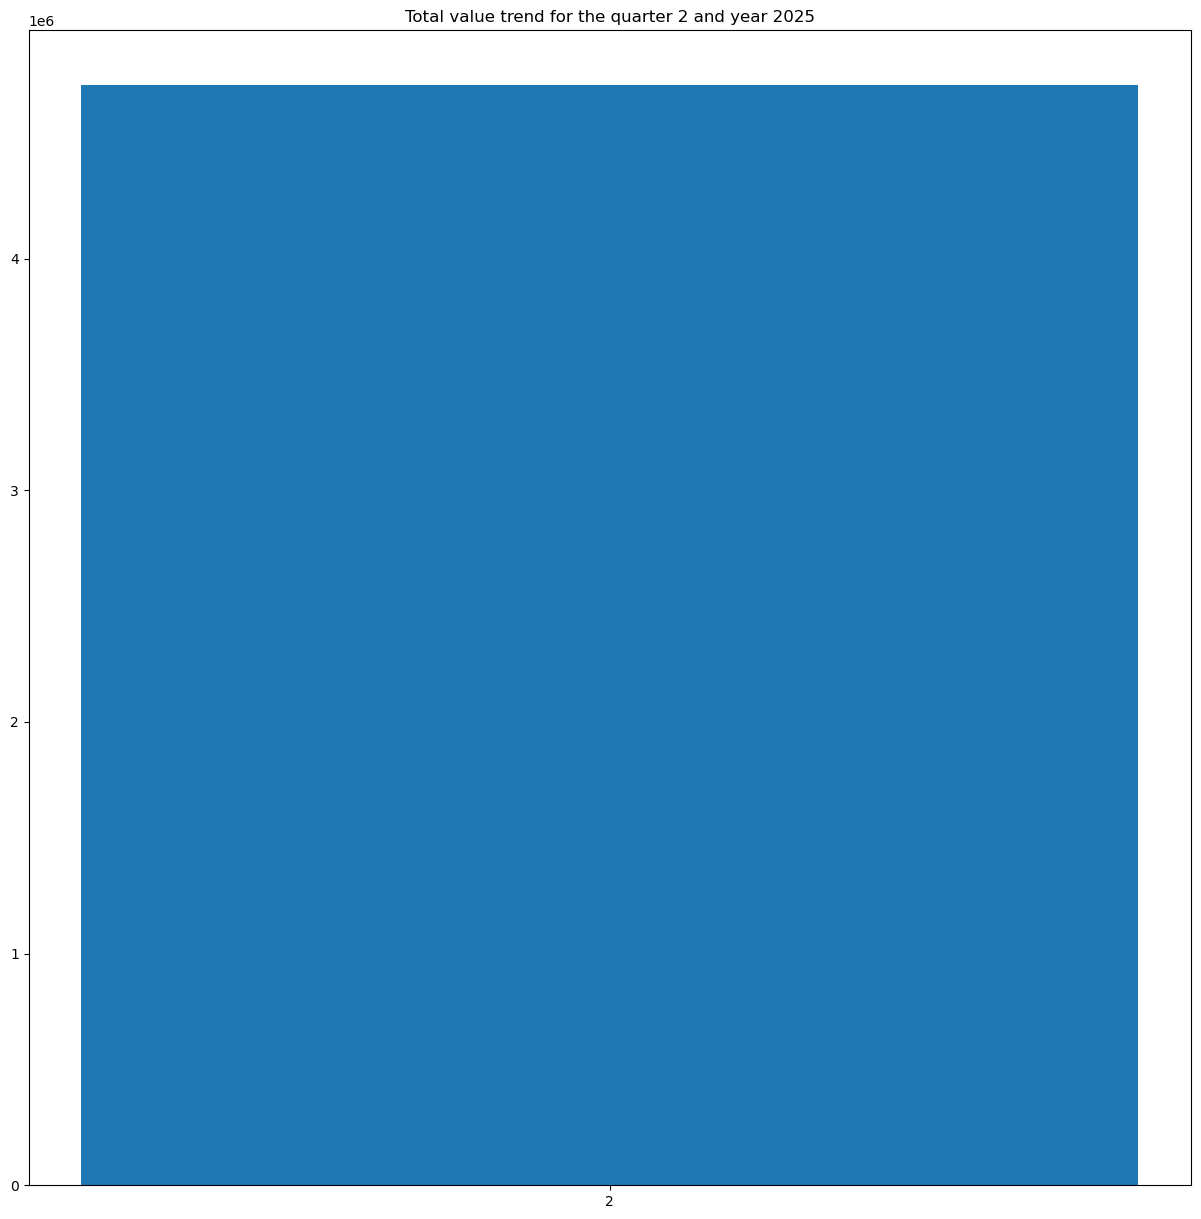

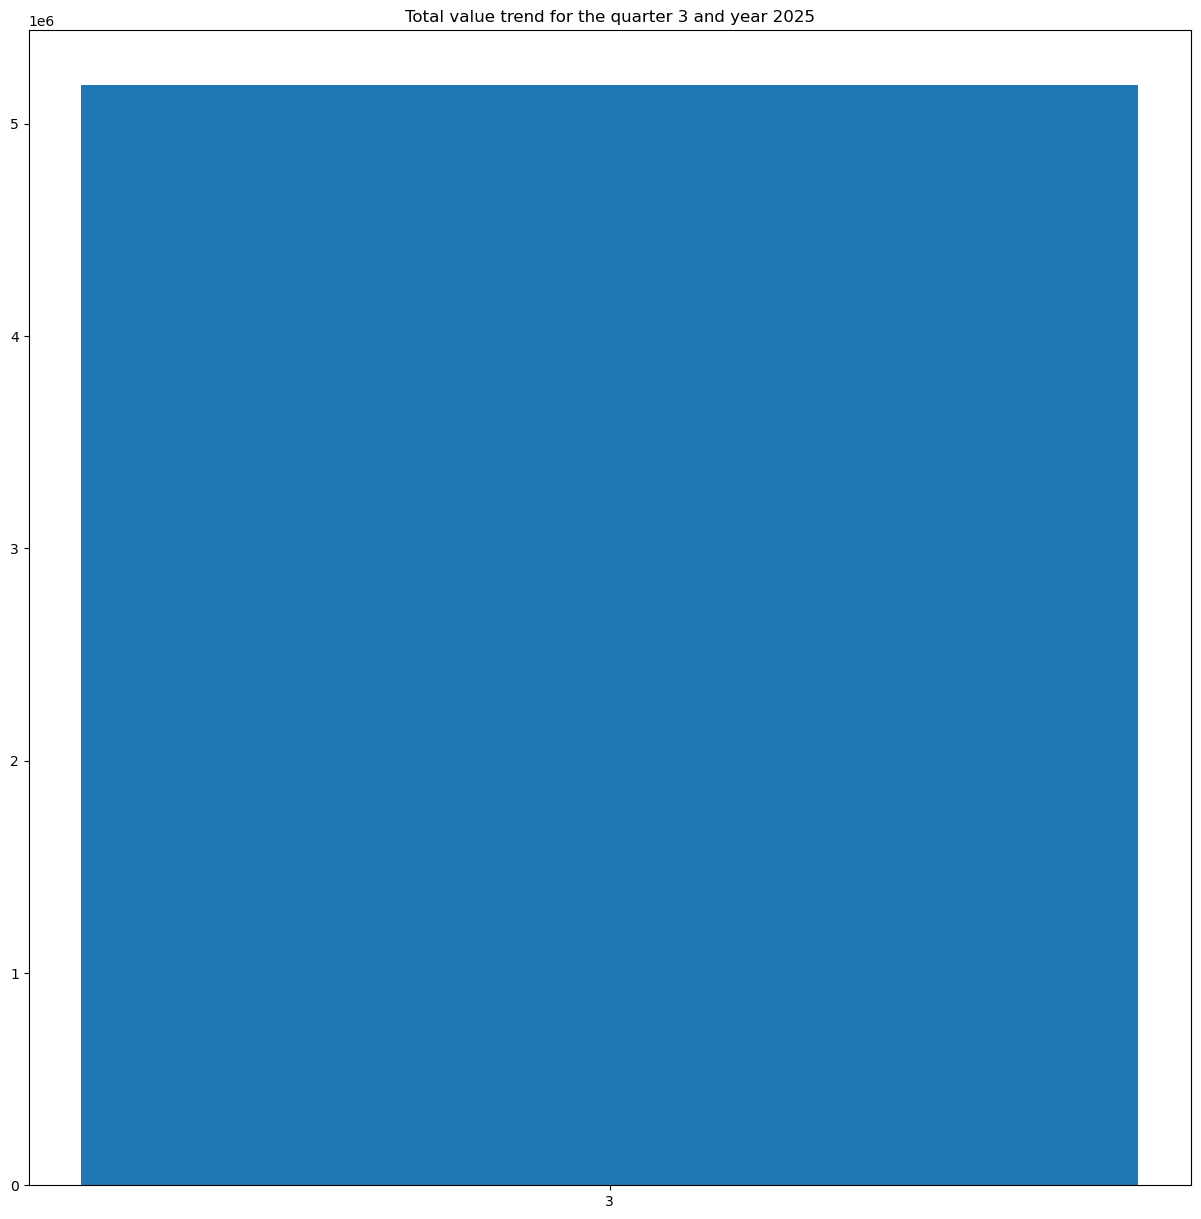

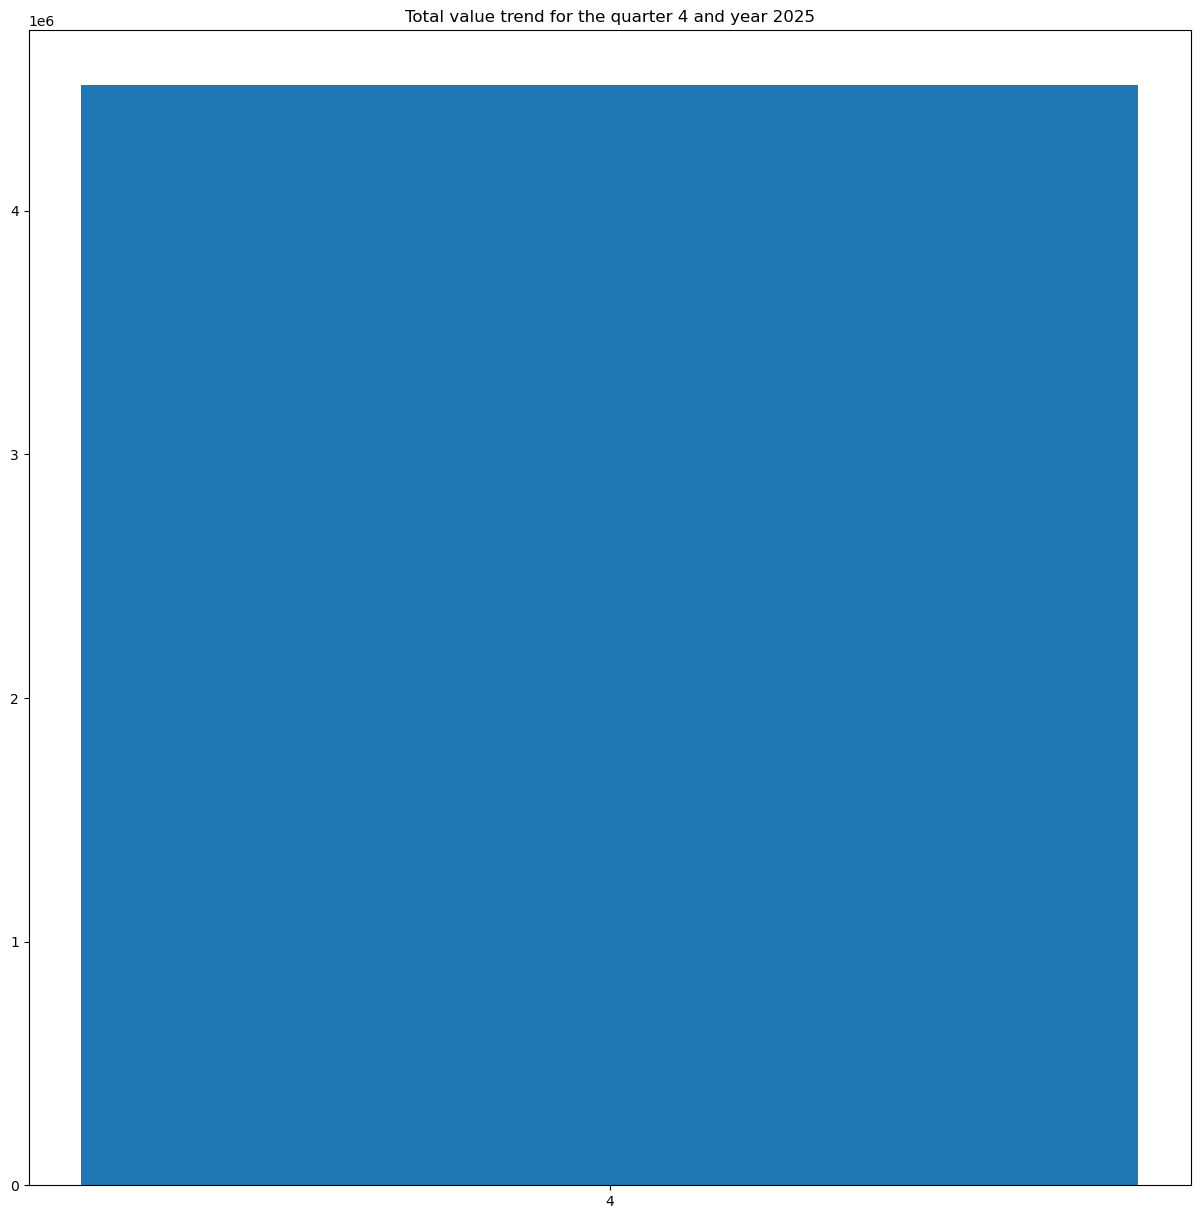

In [47]:
for year in transacting_years:
    for quarter in quarters:
        needed_df = df1[(df1['Transaction_year'] == year) & (df1['Quarter'] == quarter)]
        plt.figure(figsize=(15, 15))
        plt.bar(needed_df['Transaction_week'], needed_df['Total_Transaction_Value'])
        plt.xticks(needed_df['Transaction_week'])
        plt.title(f'Total value trend for the quarter {quarter} and year {year}')
        plt.show()

In [48]:
# for each year and each month, find out the total transaction value trend day on day (monday,tuesday,...sunday) - 36 bar charts

In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1095
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1096 non-null   int64         
 1   Date                     1096 non-null   object        
 2   Customer_ID              1096 non-null   object        
 3   Transaction_Amount       1096 non-null   float64       
 4   Transaction_Type         1096 non-null   object        
 5   Payment_Method           1096 non-null   object        
 6   Account_Balance          1096 non-null   float64       
 7   Category                 1096 non-null   object        
 8   Location                 1096 non-null   object        
 9   Transaction_Status       1096 non-null   object        
 10  Date_Modified_only_date  1096 non-null   datetime64[ms]
 11  Transaction_month        1096 non-null   int32         
 12  Transaction_year         1096 non-null 

In [50]:
data1['month_name'] = data1['Date_Modified_only_date'].dt.strftime('%B') # month name
data1['day_number'] = data1['Date_Modified_only_date'].dt.strftime('%w') # day number in a week

In [51]:
day_wise_df = data1.groupby(['Transaction_year','Transaction_month','month_name','Day_name','day_number'])['Transaction_Amount'].sum().reset_index()

In [52]:
day_wise_df = day_wise_df.sort_values(by=['Transaction_year','Transaction_month','day_number'], ascending = True)

In [53]:
transacting_years = sorted(list(set(data1['Transaction_year'].tolist())))

In [54]:
month_numbers = sorted(list(set(data1['Transaction_month'].tolist())))

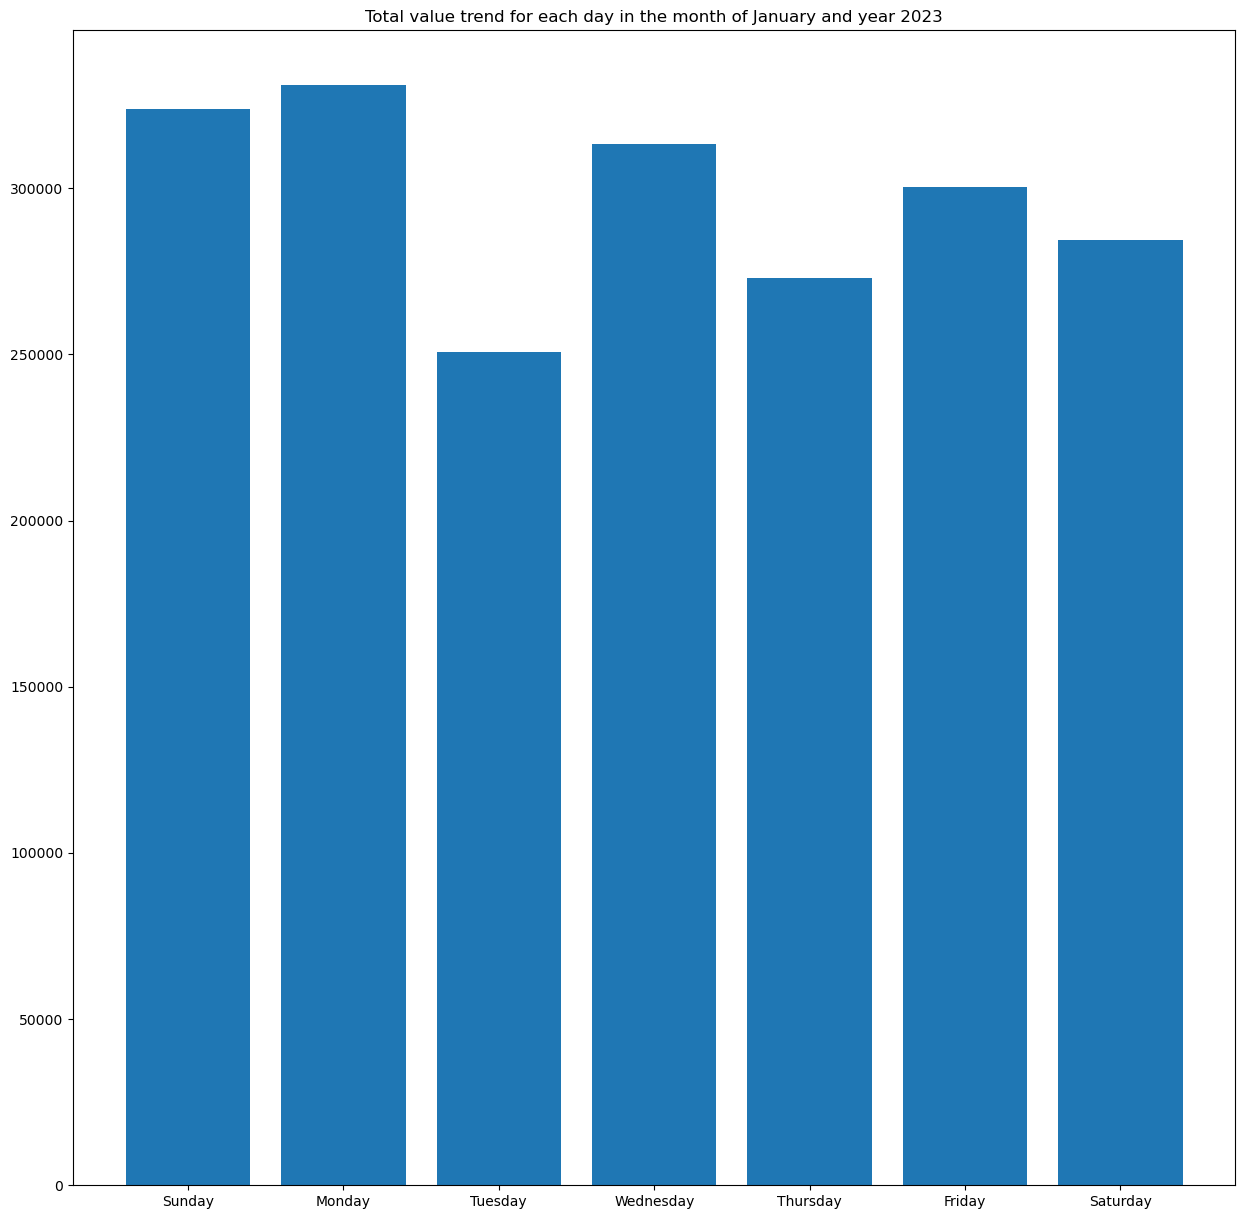

IndexError: list index out of range

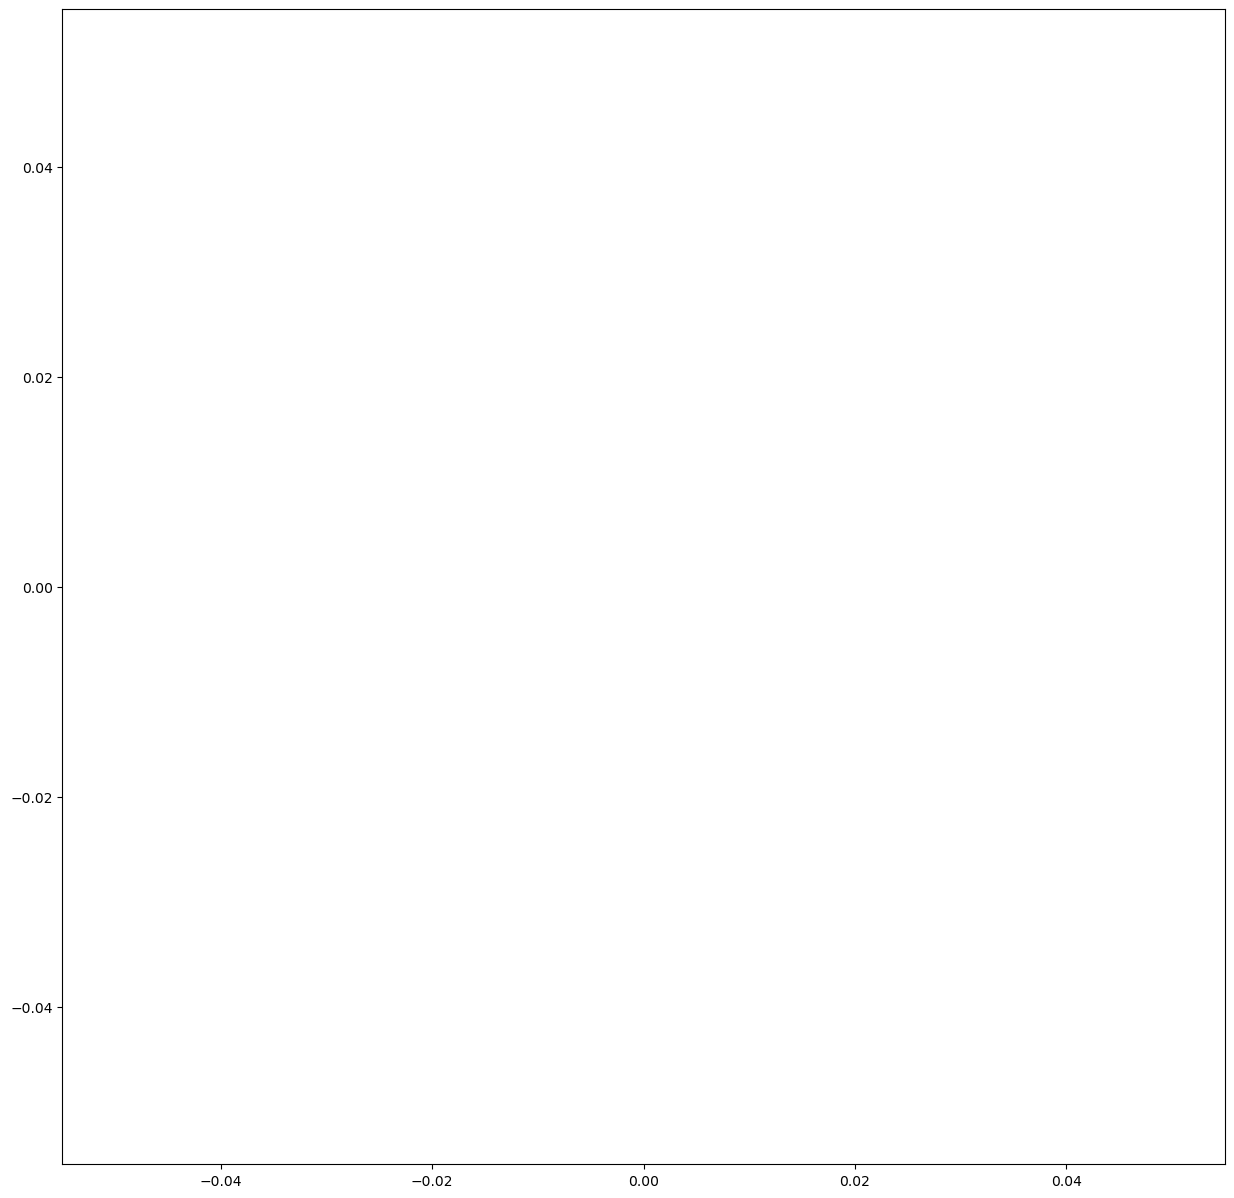

In [55]:
for year in transacting_years:
    for month in month_numbers:
        needed = day_wise_df[(day_wise_df['Transaction_year']==year) & (day_wise_df['Transaction_month'])==month]
        month_name = list(set(needed['month_name'].tolist()))
        plt.figure(figsize = (15,15))
        plt.bar(needed['Day_name'], needed['Transaction_Amount'])
        plt.title(f'Total value trend for each day in the month of {month_name[0]} and year {year}')
        plt.show()

### 2. location wise analysis - Hotspots - (customer count > median customer count and transaction value > average transaction value)

In [ ]:
data.head()

In [ ]:
# which Location has the highest transaction value(max transaction)?

In [ ]:
loc = data.groupby(['Location'])['Transaction_Amount'].max().reset_index().nlargest(1,'Transaction_Amount')

In [ ]:
loc

In [ ]:
# Hotspots
# Median customer count - First find the customer count for each location, then get the median
# Average total transaction value - first get the total transaction value for each location and then take the avg of those values

In [ ]:
median_df = data.groupby(['Location'])['Customer_ID'].count().reset_index()

In [ ]:
median_df = median_df.rename(columns={'Customer_ID':'Total customers'})

In [ ]:
median_df

In [ ]:
median_df['Total customers'].median()

In [ ]:
sum_tran = data.groupby(['Location'])['Transaction_Amount'].sum().round(2).reset_index()

In [ ]:
sum_tran = sum_tran.rename(columns={'Transaction_Amount':'Total transaction value'})

In [ ]:
sum_tran

In [ ]:
avg_tran = sum_tran['Transaction_Amount'].mean().round(0)

In [ ]:
avg_tran

In [ ]:
join_df = pd.merge(median_df,sum_tran, on='Location', how='inner')

In [ ]:
join_df

In [ ]:
# 3. payment method analysis - in which payment type is there maximum failures,

In [62]:
failed_status = data[['Payment_Method','Transaction_Status']].value_counts().reset_index()
failed_status

,Payment_Method,Transaction_Status,count
0,Credit Card,Failed,145
1,Debit Card,Completed,135
2,Credit Card,Pending,128
3,Bank Transfer,Completed,120
4,Debit Card,Failed,117
5,Bank Transfer,Failed,116
6,Credit Card,Completed,115
7,Bank Transfer,Pending,110
8,Debit Card,Pending,110


In [64]:
failed_status_sep = failed_status.pivot(index='Payment_Method',columns='Transaction_Status',values='count')
failed_status_sep

Transaction_Status,Completed,Failed,Pending
Payment_Method,,,
Bank Transfer,120,116,110
Credit Card,115,145,128
Debit Card,135,117,110


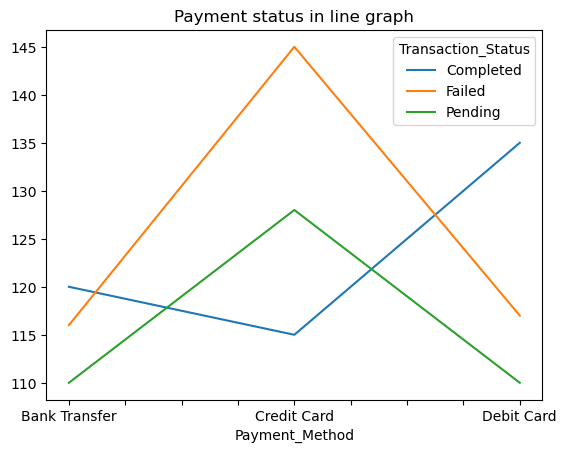

In [70]:
failed_status_sep.plot(kind='line')
plt.title('Payment status in line graph') # x axis is the index of the pivot, y axis is values of pivot, legend is the columns of the pivot
plt.show()

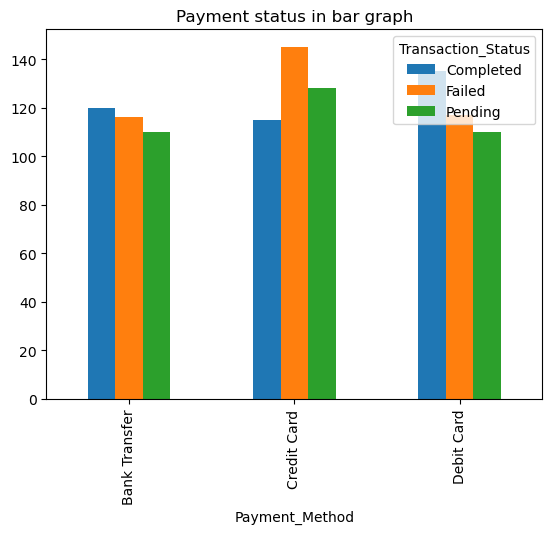

In [68]:
failed_status_sep.plot(kind='bar')
plt.title('Payment status in bar graph')
plt.show()

In [74]:
failed_status_sep['Row total']= failed_status_sep.sum(axis =1)
failed_status_sep

Transaction_Status,Completed,Failed,Pending,Row total
Payment_Method,,,,
Bank Transfer,120,116,110,692
Credit Card,115,145,128,776
Debit Card,135,117,110,724


In [78]:
failed_status_sep['% of successful transactions'] = failed_status_sep['Completed'] * 100.0 / failed_status_sep['Row total']
failed_status_sep['% of successful transactions'] = failed_status_sep['% of successful transactions'].round(2)
failed_status_sep

Transaction_Status,Completed,Failed,Pending,Row total,% of successful transactions
Payment_Method,,,,,
Bank Transfer,120,116,110,692,17.34
Credit Card,115,145,128,776,14.82
Debit Card,135,117,110,724,18.65


In [82]:
failed_status_sep['% of pending or faild transactions'] = 100 - failed_status_sep['% of successful transactions']
failed_status_sep

Transaction_Status,Completed,Failed,Pending,Row total,% of successful transactions,% of pending or faild transactions
Payment_Method,,,,,,
Bank Transfer,120,116,110,692,17.34,82.66
Credit Card,115,145,128,776,14.82,85.18
Debit Card,135,117,110,724,18.65,81.35


In [ ]:
# 5. purchasing power - average account balance + average order value

In [ ]:
# avg transaction values for each category
# avg transaction values for each location

In [88]:
loc_wise_avg_tran_value = data.groupby(['Location'])['Transaction_Amount'].mean().round(2).reset_index()
loc_wise_avg_tran_value

,Location,Transaction_Amount
0,Chicago,52323.69
1,Houston,50115.65
2,Los Angeles,52793.52
3,Miami,49559.10
4,New York,49448.41


In [90]:
cat_wise_avg_tran_value = data.groupby(['Category'])['Transaction_Amount'].mean().round(2).reset_index()
cat_wise_avg_tran_value

,Category,Transaction_Amount
0,Clothing,49351.92
1,Dining,54912.29
2,Electronics,47678.17
3,Groceries,48869.06
4,Savings,53389.76


In [92]:
#purchasing power =avg_balance + avg_order value
avg_cat_Trans_bal=data.groupby("Category")["Transaction_Amount"].mean().round(2).reset_index()
print(avg_cat_Trans_bal)
print("-------------------------------")
avg_loc_Trans_bal=data.groupby("Location")["Transaction_Amount"].mean().round(2).reset_index()
print(avg_loc_Trans_bal)


print("-------------------------------")
avg_cat_bal=data.groupby("Category")["Account_Balance"].mean().round(2).reset_index()
print(avg_cat_bal)
print("-------------------------------")
avg_loc_bal=data.groupby("Location")["Account_Balance"].mean().round(2).reset_index()
print(avg_loc_bal)

print("-------------------------------")
merged_data_1=pd.merge(avg_cat_Trans_bal,avg_cat_bal,on="Category",how="inner")
merged_data_2=pd.merge(avg_loc_Trans_bal,avg_loc_bal,on="Location",how="inner")
print(merged_data_1)
print("-------------------------------")
print(merged_data_2)

      Category  Transaction_Amount
0     Clothing            49351.92
1       Dining            54912.29
2  Electronics            47678.17
3    Groceries            48869.06
4      Savings            53389.76
-------------------------------
      Location  Transaction_Amount
0      Chicago            52323.69
1      Houston            50115.65
2  Los Angeles            52793.52
3        Miami            49559.10
4     New York            49448.41
-------------------------------
      Category  Account_Balance
0     Clothing        561888.51
1       Dining        540295.74
2  Electronics        555344.83
3    Groceries        537686.68
4      Savings        575018.84
-------------------------------
      Location  Account_Balance
0      Chicago        552467.16
1      Houston        560749.89
2  Los Angeles        557917.00
3        Miami        545208.65
4     New York        552145.76
-------------------------------
      Category  Transaction_Amount  Account_Balance
0     Clothing  

In [ ]:
# objective is to get a score for each customer and depending upon the customer score segment them into 4 categories
# score is determined by recency, frequency and monetary
# is there any noise - unwanted values or incorrect values